# <span style="color:rgb(160,0,86)">Regressionsanalyse</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie können mit der **Methode der kleinsten Quadrate** die Koeffizienten eines Modells schätzen.
- Sie kennen die Bedeutung des **Standardfehlers der Residuen** und des **Bestimmtheitsmasses**. 
- Sie können mit einem Hypothesentest prüfen, ob der **Einfluss eines Prädiktors** signifikant ist.  
- Sie können **Konfidenzintervalle** für Prädiktoren berechnen.  
- Sie können **Vorhersageintervalle** für Schätzungen berechnen. 
***

### <span style="color:rgb(160,0,86)">Was ist eine Regressionsanalyse?</span>

Die Regressionsanalyse ist ein zentrales statistisches Verfahren zur Beschreibung von Zusammenhängen zwischen Variablen. Ziel ist es, den Einfluss einer oder mehrerer unabhängiger Variablen, 

- die so genannen **Prädiktoren** $x_1, x_2, \ldots , x_n$

auf eine abhängige Variable,

- die so genannte **Zielgrösse** $y$

zu quantifizieren und Vorhersagen zu ermöglichen. Dabei wird ein mathematisches **Modell** $$y=\texttt{predict}(x_1,x_2,\ldots,x_n)\;,$$ typischerweise eine *lineare Funktion* verwendet, das die Beziehung zwischen den Variablen beschreibt.

Die einfachste Form ist die **lineare Einfachregression**, bei der eine abhängige Variable durch genau eine unabhängige Variable erklärt wird: $$\;\;y = \texttt{predict}(x) = a\cdot x + b$$ 

In vielen Anwendungen ist jedoch die **multiple lineare Regression** relevant, bei der mehrere Einflussgrössen gleichzeitig betrachtet werden:
$$\;\;y = \texttt{predict}(x_1,x_2,\ldots,x_n) = a_1\cdot x_1 + a_2\cdot x_2 + \ldots a_n\cdot x_n + b$$

Die *aus einer Stichprobe geschätzten* **Regressionskoeffizienten** $\pmb{\hat{a}_1}, \pmb{\hat{a}_2}, \ldots, \pmb{\hat{a}_n}$ geben dabei an, wie stark sich die Zielvariable verändert, wenn sich ein Prädiktor ändert – unter Konstanthaltung aller anderen Variablen. Wir bezeichen daher die $\pmb{\hat{a}_i}$ auch als **Gewichte der Prädiktoren** $\pmb{x_i}$.

Neben der Schätzung der Modellparameter erlaubt die Regressionsanalyse auch die **statistische Bewertung der Modellgüte**, die **Signifikanzprüfung einzelner Prädiktoren** und die **Quantifizierung der Vorhersageunsicherheit**. 

Moderne Varianten der Regressionsanalyse – wie etwa nichtlineare Modelle – erweitern die klassischen Methoden um zusätzliche Flexibilität.

Die Regressionsanalyse findet breite Anwendung in zahlreichen Fachbereichen wie Informatik, Ökonomie, Psychologie, Medizin, Technik und den Sozialwissenschaften und bildet dort oft das methodische Rückgrat für empirische Untersuchungen.  

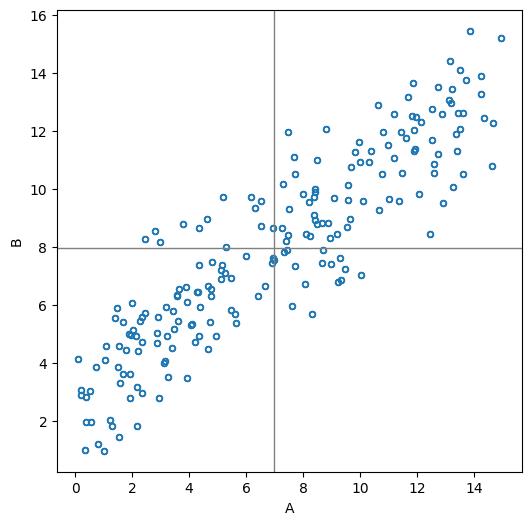

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Wir erzeugen einen Datensatz mit zweie Merkmalen A und B, die korreliert sind
A = np.random.uniform(low=0,high=15,size=200)
B = 0.7*A + 3 + np.random.normal(0,1.5,200) 

df = pd.DataFrame({"A":A,"B":B})

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.axhline(B.mean(), color="grey", lw=1)
ax1.axvline(A.mean(), color="grey", lw=1)
df.plot.scatter(x = "A", y = "B", ax = ax1, marker="$\u25EF$")
ax1.set_xlabel("A")
ax1.set_ylabel("B")

plt.show()

In [2]:
df.corr()

,A,B
A,1.000000,0.899644
B,0.899644,1.000000


### <span style="color:rgb(160,0,86)">Wie finden wir die Koeffizienten des Modells?</span>

Für alle Datenpunkte berechnen wir das **Residuum** $$r_i = y_i - \texttt{precidt}(x_i) = y_i - (a\cdot x_i + b)$$ und bestimmen die Koeffizienten $a$ und $b$ so, dass die **Summe der Residuenquadrate RSS** minimal wird: $$\text{finde }\;\pmb{a}\;\text{ und }\;\pmb{b}\;\text{ so, dass }\; \pmb{\mathsf{RSS} = r_1^2+r_2^2+r_3^2+\ldots+r_n^2} \;\text{ minimal }$$  

In [3]:
from scipy.optimize import minimize

def model(x,a,b):
    return a*x + b

def RSS(coeffs):
    residuen = B - model(A,coeffs[0],coeffs[1])
    return (residuen**2).sum()

fit = minimize(RSS, x0=np.zeros(2))
fit
# fun: kleinste Summe aller Residuen


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 419.1620417846194
        x: [ 7.141e-01  2.952e+00]
      nit: 4
      jac: [ 0.000e+00 -3.815e-06]
 hess_inv: [[ 1.433e-04 -1.002e-03]
            [-1.002e-03  9.505e-03]]
     nfev: 18
     njev: 6

In [4]:
n = 5000
TestwerteA = np.random.uniform(low=0,high=10,size=n)
TestwerteB = np.random.uniform(low=0,high=10,size=n)

Opt_test = True
for i in range(n):
    if RSS((TestwerteA[i],TestwerteB[i])) < fit.fun:
        Opt_test = False
        print(RSS((TestwerteA[i],TestwerteB[i])))
print("RSS ist offensichtlich minimal:",Opt_test)

RSS ist offensichtlich minimal: True


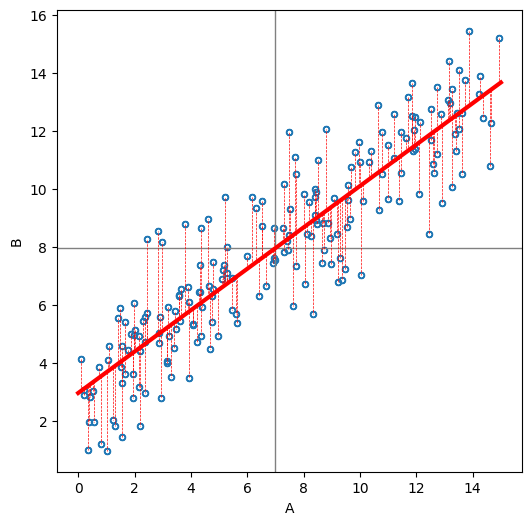

In [5]:
def predict(x):
    return model(x,fit.x[0],fit.x[1])

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.axhline(B.mean(), color="grey", lw=1)
ax1.axvline(A.mean(), color="grey", lw=1)
ax1.vlines(A,predict(A),B,linestyles="dashed",lw=0.5,color="red")
df.plot.scatter(x = "A", y = "B", ax = ax1, marker="$\u25EF$")
ax1.set_xlabel("A")
ax1.set_ylabel("B")

x = np.linspace(0,15,50)
y = model(x,fit.x[0],fit.x[1])
ax1.plot(x,y,color="red",lw=3)
plt.show()

### <span style="color:rgb(160,0,86)">Wie können wir das Modell bewerten?</span>

- Für ein Modell mit einem Prädiktor $\pmb{x}$ können wir den sogenannten **Standardfehler der Residuen** berechen: $$\pmb{\mathsf{RSE} = \sqrt{\frac{\mathsf{RSS}}{n}}=\sqrt{\frac{r_1^2+r_2^2+r_3^2+\ldots+r_n^2}{n}} }$$  
**RSE** ist ein **Gütemass** für ein angepasstes Regressionsmodell. 

- Eine weitere nützliche Metrik für die Anpassung ist das sogenannte **Bestimmtheitsmass**: $$\pmb{R^2=\frac{\mathsf{MQD}\, \{\,\texttt{predict}(x_1),\,\texttt{predict}(x_2),\ldots,\,\texttt{predict}(x_n)\,\}}{\mathsf{MQD}\,\{\,y_1,\,y_2,\ldots,\,y_n\,\}}}$$ Es gilt $\pmb{0\leqslant R^2\leqslant 1}$ und der Wert gibt an, welcher **Bruchteil der mittleren qudratischen Abweichung MQD** das Modell erklären kann. Für ***lineare Modell*** gilt die Beziehung $$\pmb{R^2 = r^2}$$ zwischen dem **Bestimmtheitsmass** $\pmb{R^2}$ und dem   **Korrelationskoeffizient** $\pmb{r}$.   

In [6]:
# Residual standard Error für einen Prädiktor 
RSE = np.sqrt(1 / df.shape[0] * ((B - predict(A))**2).sum())

print(RSE,np.sqrt(fit.fun / df.shape[0]))

1.4476913375865372 1.4476913375865372


In [7]:
# Bestimmtheismass R^2
R_squared = predict(A).var() / B.var()
print(R_squared,df.corr().loc["A","B"]**2)
# ungefähr 80% der Varianz ist durch das Modell erklärt.

0.8093587313648293 0.8093587812451725


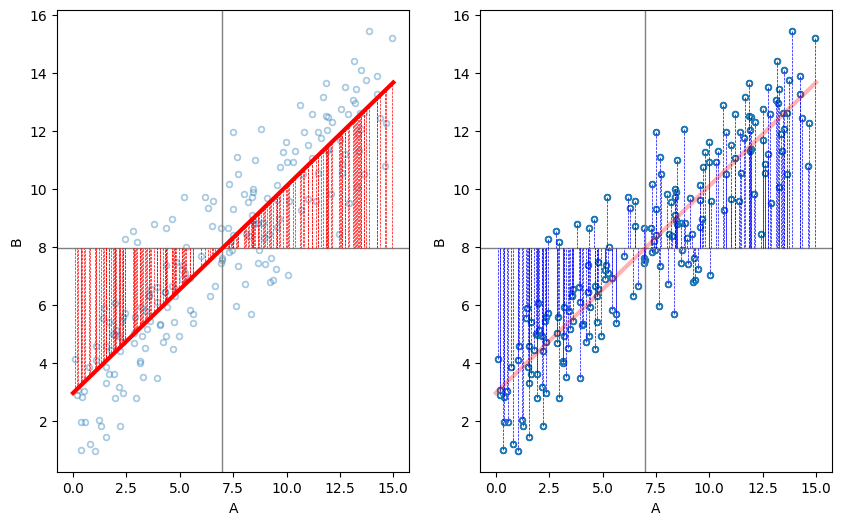

In [8]:
x = np.linspace(0,15,50)
y = model(x,fit.x[0],fit.x[1])

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.axhline(B.mean(), color="grey", lw=1)
ax1.axvline(A.mean(), color="grey", lw=1)
ax1.vlines(A,predict(A),predict(A).mean(),linestyles="dashed",lw=0.5,color="red")
df.plot.scatter(x = "A", y = "B", ax = ax1, marker="$\u25EF$",alpha = 0.3)
ax1.set_xlabel("A")
ax1.set_ylabel("B")
ax1.plot(x,y,color="red",lw=3)

ax2 = fig.add_subplot(1,2,2)
ax2.axhline(B.mean(), color="grey", lw=1)
ax2.axvline(A.mean(), color="grey", lw=1)
ax2.vlines(A,B,B.mean(),linestyles="dashed",lw=0.5,color="blue")
df.plot.scatter(x = "A", y = "B", ax = ax2, marker="$\u25EF$")
ax2.set_xlabel("A")
ax2.set_ylabel("B")
ax2.plot(x,y,color="red",lw=3,alpha = 0.3)
plt.show()

# Links: MQD vom Modell -> Abweichung der Daten wenn sie geschätzt werden
# Rechts: MQD von den wahren Daten
# Bestimmtheitsmass: wie viel Prozent macht das blaue vom Roten aus?

### <span style="color:rgb(160,0,86)">Wie können wir testen, ob ein Prädiktor einen Einfluss hat?</span>

Der $\pmb{p}$**-Wert** in einer Regressionsanalyse gibt an, ob ein ***beobachteter Regressionskoeffizient*** rein zufällig entstanden sein könnte. Wir machen also einen Hypothesentest unter der Annahme, dass kein echter ***Zusammenhang zwischen dem Prädiktor und der Zielvariablen*** besteht: 

- Die **Nullhypothese** für das **Gewicht** $\,\pmb{a}$ ist $\quad \pmb{H_0:\; a = 0}$ <br>
mit der **Alternativhypothese** $\quad \pmb{H_1:\; a \neq 0}$

In [9]:
# Permutationstest
n_permutations = 1000
coefs = []

for _ in range(n_permutations):
    B_permuted = np.random.permutation(B)
    def RSS(coeffs):
        residuen = B_permuted - model(A,coeffs[0],coeffs[1])
        return (residuen**2).sum()
    fit_permuted = minimize(RSS, x0=np.zeros(2))
    coefs.append(fit_permuted.x[0])

# p-Wert berechnen (zweiseitig)
coefs = np.array(coefs)
p_value = 100 * np.mean(np.abs(coefs) >= np.abs(fit.x[0]))

print(f"Beobachteter Koeffizient: {fit.x[0]:.4f}")
print(f"Resampling-basierter p-Wert: {p_value:}")


Beobachteter Koeffizient: 0.7141
Resampling-basierter p-Wert: 0.0


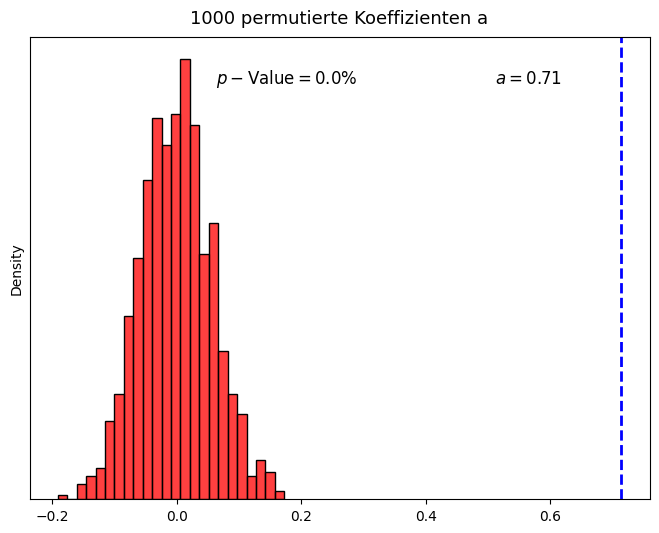

In [10]:
import seaborn as sns

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax = sns.histplot(coefs,stat="density",color="red")
ax = plt.axvline(fit.x[0],color="blue",lw=2,linestyle="dashed")
ax = plt.text(0.75,0.9,r"$a=$"+"{m:1.2f}".format(m=fit.x[0]),
                   fontsize=12,transform=plt.gca().transAxes)
ax = plt.text(0.3,0.9,r"$p-$"+"Value"+r"$ = $"+"{p:1.1f}%".format(p=p_value),
                   fontsize=12,transform=plt.gca().transAxes)
ax = plt.title("1000 permutierte Koeffizienten a",
                    fontsize=13,pad=10)
ax = plt.xlabel("")
ax = plt.yticks([])

Mit einem **Konfidenzintervalle** können wir angeben, mit welcher statistischen Sicherheit sich die wahren Regressionskoeffizienten $\pmb{a_i}$ innerhalb eines bestimmten Bereichs befinden. 

Während die geschätzten Koeffizienten $\pmb{\hat{a}_i}$ einer Regression lediglich Punktwerte sind, berücksichtigen Konfidenzintervalle die Unsicherheit, die durch Stichprobenfehler entsteht.

- Ein **95%-Konfidenzintervall** für einen Regressionskoeffizienten bedeutet beispielsweise, dass bei wiederholter Durchführung des Experiments in 95% der Fälle ein Intervall berechnet wird, das den wahren Wert des Koeffizienten enthält. Liegt das Intervall vollständig ober- oder unterhalb von null, deutet das auf einen statistisch signifikanten Einfluss des Prädiktors hin.

- Konfidenzintervalle liefern damit eine **ergänzende Information** zum p-Wert: Während der p-Wert eine Ja/Nein-Aussage über die Signifikanz trifft, zeigen Konfidenzintervalle zusätzlich die **Grössenordnung und Unsicherheit** des geschätzten Effekts.

In [12]:
n_bootstrap = 1000
coef_samples = []
n = df.shape[0]

for _ in range(n_bootstrap):
    indices = np.random.choice(n, n, replace=True)
    A_sample = A[indices]
    B_sample = B[indices]
    def RSS(coeffs):
        residuen = B_sample - model(A_sample,coeffs[0],coeffs[1])
        return (residuen**2).sum()
    fit_permuted = minimize(RSS, x0=np.zeros(2))
    coef_samples.append(fit_permuted.x[0])

# Konfidenzintervall berechnen (z. B. 95%)
lower = np.percentile(coef_samples, 2.5)
upper = np.percentile(coef_samples, 97.5)

print(f"Beobachteter Koeffizient: {fit.x[0]:.4f}")
print(f"95%-Konfidenzintervall (Bootstrap): [{lower:.4f}, {upper:.4f}]")

Beobachteter Koeffizient: 0.7141
95%-Konfidenzintervall (Bootstrap): [0.6637, 0.7602]


### <span style="color:rgb(160,0,86)">Wie können wir eine Vorhersage beurteilen?</span>

**Vorhersageintervalle** quantifizieren die ***Unsicherheit bei der Prognose*** einzelner zukünftiger Werte der Zielvariablen auf Basis des Regressionsmodells. 

- Im Gegensatz zum Konfidenzintervall, das den wahren Mittelwert der Zielgrösse für gegebene Prädiktorwerte beschreibt, berücksichtigt das Vorhersageintervall zusätzlich die **zufällige Streuung neuer Beobachtungen** um diesen Mittelwert.

- Ein **95%-Vorhersageintervall** gibt an, dass in 95% der Fälle der tatsächliche Wert der Zielvariable einer neuen Beobachtung innerhalb des angegebenen Intervalls liegen wird – vorausgesetzt, das Modell ist korrekt spezifiziert.

Da das Vorhersageintervall sowohl die **Unsicherheit der Modellschätzung** als auch die **natürliche Streuung neuer Datenpunkte** umfasst, ist es breiter als das Konfidenzintervall. 

- Es ist besonders nützlich, wenn das Ziel nicht die Erklärung, sondern die Prognose zukünftiger Werte ist.

In [13]:
# Neues Beispiel und Vorhersage
a_new = 5.86
b_predict = predict(a_new)
print("Für a =",a_new,"finden wir die Vorhersage b =",b_predict)

Für a = 5.86 finden wir die Vorhersage b = 7.1364755278032215


In [14]:
# Anzahl der Bootstrap-Samples
n_bootstrap = 1000
predictions = []

for _ in range(n_bootstrap):
    indices = np.random.choice(n, n, replace=True)
    A_sample = A[indices]
    B_sample = B[indices]
    def RSS(coeffs):
        residuen = B_sample - model(A_sample,coeffs[0],coeffs[1])
        return (residuen**2).sum()
    fit_permuted = minimize(RSS, x0=np.zeros(2))
    
    # Vorhersage inkl. zufälligem Fehler (residuenbasiert)
    def predict(x):
        return model(x,fit_permuted.x[0],fit_permuted.x[1])
    b_pred = predict(a_new)
    
    # Schätzfehler aus Residuen
    residuals = B_sample - predict(A_sample)
    error = np.random.choice(residuals) # Zufälliges wählen eines Fehlers
    b_pred_with_noise = b_pred + error

    predictions.append(b_pred_with_noise)

# 95%-Vorhersageintervall
lower = np.percentile(predictions, 2.5)
upper = np.percentile(predictions, 97.5)

print(f"Vorhersage mit Modell bei x={a_new}: {b_predict:.4f}")
print(f"95%-Vorhersageintervall bei x={a_new}: [{lower:.4f}, {upper:.4f}]")


Vorhersage mit Modell bei x=5.86: 7.1365
95%-Vorhersageintervall bei x=5.86: [4.3814, 10.2804]


***

#### <span style="color:rgb(160,0,86)">Beispiele:</span>

Betrachen wir noch einmal den **Zusammenhang** wischen *Weinkonsum* und *Mortalität*:


In [15]:
wein = pd.read_csv("Daten/Weinkonsum.csv")

wein.corr()

,Weinkonsum,Mortalität
Weinkonsum,1.000000,-0.745568
Mortalität,-0.745568,1.000000


In [16]:
def model(x,a,b):
    return a*x + b

def RSS(coeffs):
    residuen = wein["Mortalität"] - model(wein["Weinkonsum"],coeffs[0],coeffs[1])
    return (residuen**2).sum()

fit = minimize(RSS, x0=np.zeros(2))
fit

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 41.934571514998
        x: [-7.608e-02  7.687e+00]
      nit: 4
      jac: [-4.292e-06  4.292e-06]
 hess_inv: [[ 5.514e-05 -9.083e-04]
            [-9.083e-04  4.274e-02]]
     nfev: 18
     njev: 6

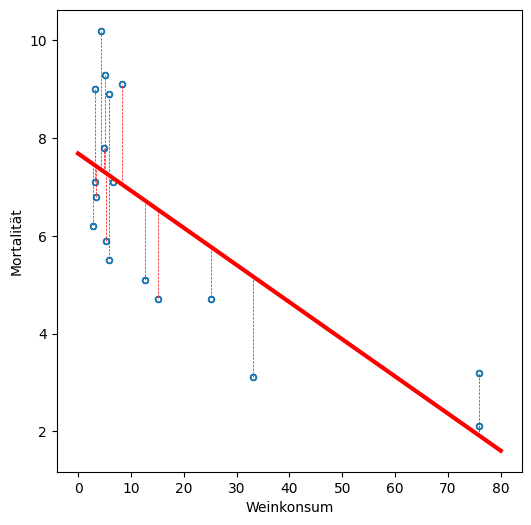

In [17]:
def predict(x):
    return model(x,fit.x[0],fit.x[1])

x = np.linspace(0,80,50)
y = model(x,fit.x[0],fit.x[1])

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.vlines(wein["Weinkonsum"],predict(wein["Weinkonsum"]),wein["Mortalität"],linestyles="dashed",lw=0.5,color="red")
wein.plot.scatter(x = "Weinkonsum", y = "Mortalität", ax = ax1, marker="$\u25EF$")
ax1.set_xlabel("Weinkonsum")
ax1.set_ylabel("Mortalität")
ax1.plot(x,y,color="red",lw=3)
plt.show()

In [18]:
# Residual standard Error für einen Prädiktor 
RSE = np.sqrt(1 / wein.shape[0] * ((wein["Mortalität"] - predict(wein["Weinkonsum"]))**2).sum())

print(RSE,np.sqrt(fit.fun / wein.shape[0]))

1.5263349624181084 1.5263349624181086


In [19]:
# Bestimmtheismass R^2 = R-squared
R_squared = predict(wein["Weinkonsum"]).var() / wein["Mortalität"].var()
print(R_squared,wein.corr().loc["Weinkonsum","Mortalität"]**2)

0.5558721650808169 0.5558719390489772


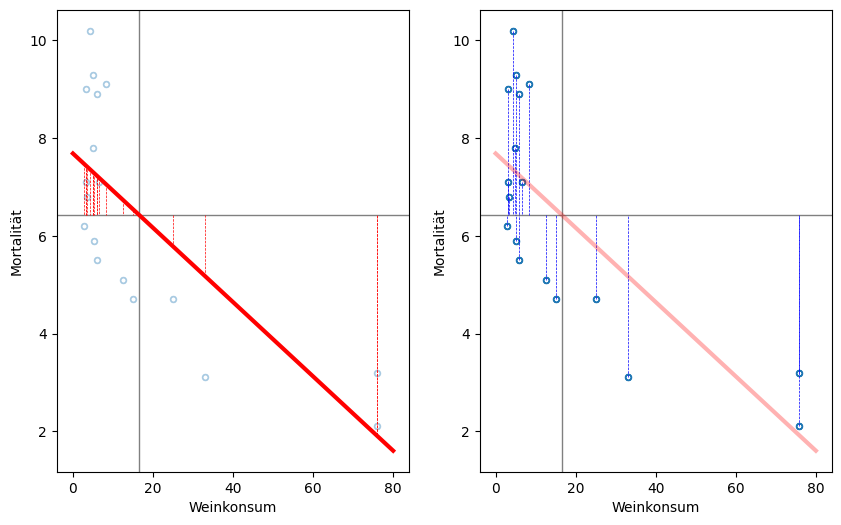

In [20]:
x = np.linspace(0,80,50)
y = model(x,fit.x[0],fit.x[1])

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.axhline(wein["Mortalität"].mean(), color="grey", lw=1)
ax1.axvline(wein["Weinkonsum"].mean(), color="grey", lw=1)
ax1.vlines(wein["Weinkonsum"],predict(wein["Weinkonsum"]),predict(wein["Weinkonsum"]).mean(),linestyles="dashed",lw=0.5,color="red")
wein.plot.scatter(x = "Weinkonsum", y = "Mortalität", ax = ax1, marker="$\u25EF$",alpha = 0.3)
ax1.set_xlabel("Weinkonsum")
ax1.set_ylabel("Mortalität")
ax1.plot(x,y,color="red",lw=3)

ax2 = fig.add_subplot(1,2,2)
ax2.axhline(wein["Mortalität"].mean(), color="grey", lw=1)
ax2.axvline(wein["Weinkonsum"].mean(), color="grey", lw=1)
ax2.vlines(wein["Weinkonsum"],wein["Mortalität"],wein["Mortalität"].mean(),linestyles="dashed",lw=0.5,color="blue")
wein.plot.scatter(x = "Weinkonsum", y = "Mortalität", ax = ax2, marker="$\u25EF$")
ax2.set_xlabel("Weinkonsum")
ax2.set_ylabel("Mortalität")
ax2.plot(x,y,color="red",lw=3,alpha = 0.3)
plt.show()

- Ein **nicht lineares Modell** könnte besser passen...
$$predict(x)=a\cdot e^{b\cdot x}+c$$


In [21]:
def model(x,a,b,c):
    return a * np.exp(1)** (b * x) + c

def RSS(coeffs):
    residuen = wein["Mortalität"] - model(wein["Weinkonsum"],coeffs[0],coeffs[1],coeffs[2])
    return (residuen**2).sum()

fit = minimize(RSS, x0=np.zeros(3))
fit

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 32.519380832945075
        x: [ 6.645e+00 -4.766e-02  2.326e+00]
      nit: 25
      jac: [ 9.537e-07  0.000e+00  0.000e+00]
 hess_inv: [[ 3.678e-01  1.369e-03 -2.666e-01]
            [ 1.369e-03  1.706e-04 -5.781e-03]
            [-2.666e-01 -5.781e-03  3.595e-01]]
     nfev: 120
     njev: 30

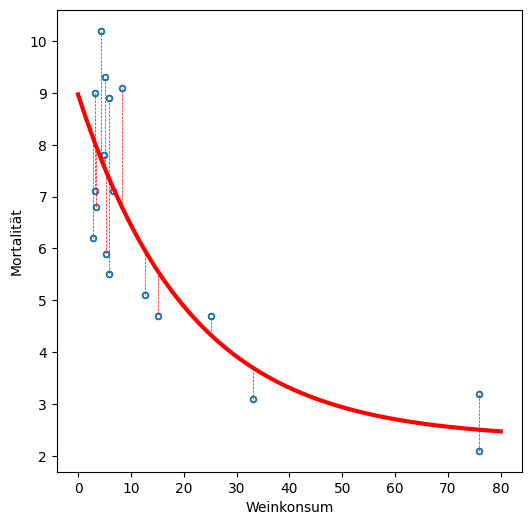

In [22]:
def predict(x):
    return model(x,fit.x[0],fit.x[1],fit.x[2])

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.vlines(wein["Weinkonsum"],predict(wein["Weinkonsum"]),wein["Mortalität"],linestyles="dashed",lw=0.5,color="red")
wein.plot.scatter(x = "Weinkonsum", y = "Mortalität", ax = ax1, marker="$\u25EF$")
ax1.set_xlabel("Weinkonsum")
ax1.set_ylabel("Mortalität")

x = np.linspace(0,80,50)
y = model(x,fit.x[0],fit.x[1],fit.x[2])
ax1.plot(x,y,color="red",lw=3)
plt.show()

In [23]:
# Residual standard Error für einen Prädiktor 
RSE = np.sqrt(1 / wein.shape[0] * ((wein["Mortalität"] - predict(wein["Weinkonsum"]))**2).sum())

print(RSE,np.sqrt(fit.fun / wein.shape[0]))

1.3441102144158226 1.3441102144158226


In [24]:
# Bestimmtheismass R^2 = R-squared
R_squared = predict(wein["Weinkonsum"]).var() / wein["Mortalität"].var()
print(R_squared,wein.corr().loc["Weinkonsum","Mortalität"]**2)

0.6555880456431157 0.5558719390489772


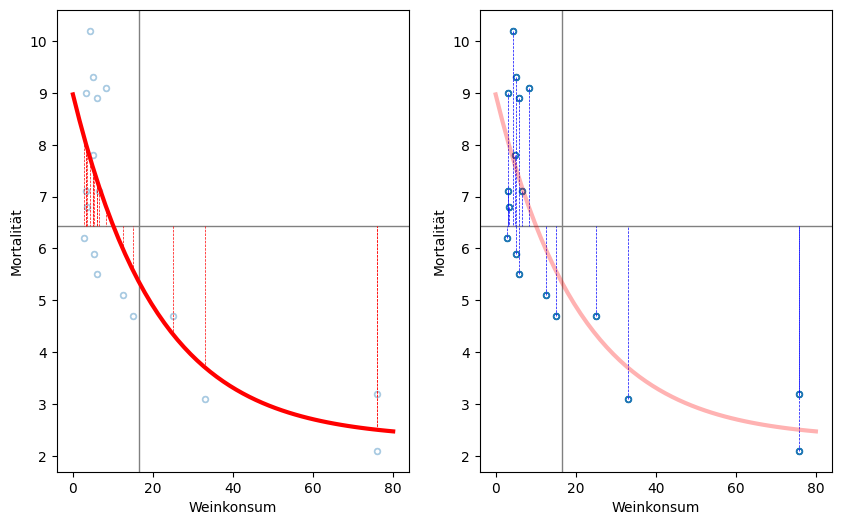

In [25]:
x = np.linspace(0,80,50)
y = model(x,fit.x[0],fit.x[1],fit.x[2])

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.axhline(wein["Mortalität"].mean(), color="grey", lw=1)
ax1.axvline(wein["Weinkonsum"].mean(), color="grey", lw=1)
ax1.vlines(wein["Weinkonsum"],predict(wein["Weinkonsum"]),predict(wein["Weinkonsum"]).mean(),linestyles="dashed",lw=0.5,color="red")
wein.plot.scatter(x = "Weinkonsum", y = "Mortalität", ax = ax1, marker="$\u25EF$",alpha = 0.3)
ax1.set_xlabel("Weinkonsum")
ax1.set_ylabel("Mortalität")
ax1.plot(x,y,color="red",lw=3)

ax2 = fig.add_subplot(1,2,2)
ax2.axhline(wein["Mortalität"].mean(), color="grey", lw=1)
ax2.axvline(wein["Weinkonsum"].mean(), color="grey", lw=1)
ax2.vlines(wein["Weinkonsum"],wein["Mortalität"],wein["Mortalität"].mean(),linestyles="dashed",lw=0.5,color="blue")
wein.plot.scatter(x = "Weinkonsum", y = "Mortalität", ax = ax2, marker="$\u25EF$")
ax2.set_xlabel("Weinkonsum")
ax2.set_ylabel("Mortalität")
ax2.plot(x,y,color="red",lw=3,alpha = 0.3)
plt.show()

#### <span style="color:rgb(160,0,86)">Beispiele:</span>

Im folgenden Datensatz wir die **Beziehung** zwischen 

- ***Exposition (Exposure)***: Anzahl Jahre, die ein Arbeiter Baumwollstaub ausgesetzt war

- ***PEFR (Peak Exspiratory Flow Rate)***: Messwert für die Lungenkapazität

In [26]:
lunge = pd.read_csv("Daten/LungDisease.csv")
print(lunge.shape)
lunge.head()

(122, 2)


,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [27]:
lunge.corr().loc["Exposure","PEFR"]

-0.27702170106840734

In [28]:
def model(x,a,b):
    return a*x + b

def RSS(coeffs):
    residuen = lunge["PEFR"] - model(lunge["Exposure"],coeffs[0],coeffs[1])
    return (residuen**2).sum()

fit = minimize(RSS, x0=np.zeros(2))
fit

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1234764.28571431
        x: [-4.185e+00  4.246e+02]
      nit: 6
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 9.300e-05 -1.336e-03]
            [-1.336e-03  2.338e-02]]
     nfev: 27
     njev: 9

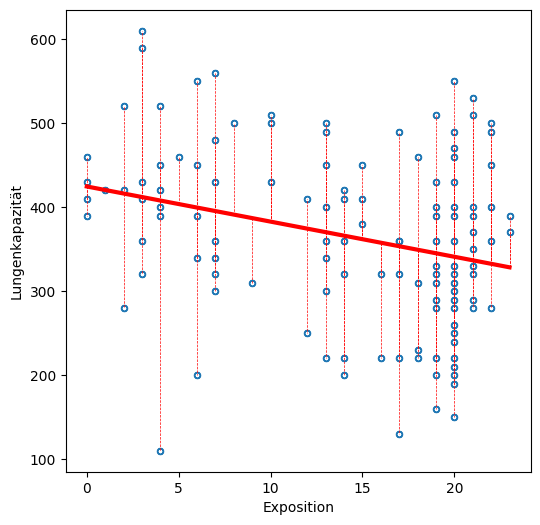

In [29]:
def predict(x):
    return model(x,fit.x[0],fit.x[1])

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.vlines(lunge["Exposure"],predict(lunge["Exposure"]),lunge["PEFR"],linestyles="dashed",lw=0.5,color="red")
lunge.plot.scatter(x = "Exposure", y = "PEFR", ax = ax1, marker="$\u25EF$")
ax1.set_xlabel("Exposition")
ax1.set_ylabel("Lungenkapazität")

x = np.linspace(0,23,50)
y = model(x,fit.x[0],fit.x[1])
ax1.plot(x,y,color="red",lw=3)
plt.show()

In [30]:
# Residual standard Error für einen Prädiktor 
RSE = np.sqrt(1 / lunge.shape[0] * ((lunge["PEFR"] - predict(lunge["Exposure"]))**2).sum())

print(RSE,np.sqrt(fit.fun / lunge.shape[0]))

100.60327397934522 100.6032739793452


In [31]:
# Bestimmtheismass R^2 = R-squared
R_squared = predict(lunge["Exposure"]).var() / lunge["PEFR"].var()
print(R_squared,lunge.corr().loc["Exposure","PEFR"]**2)

0.07674107482116956 0.07674102286283403


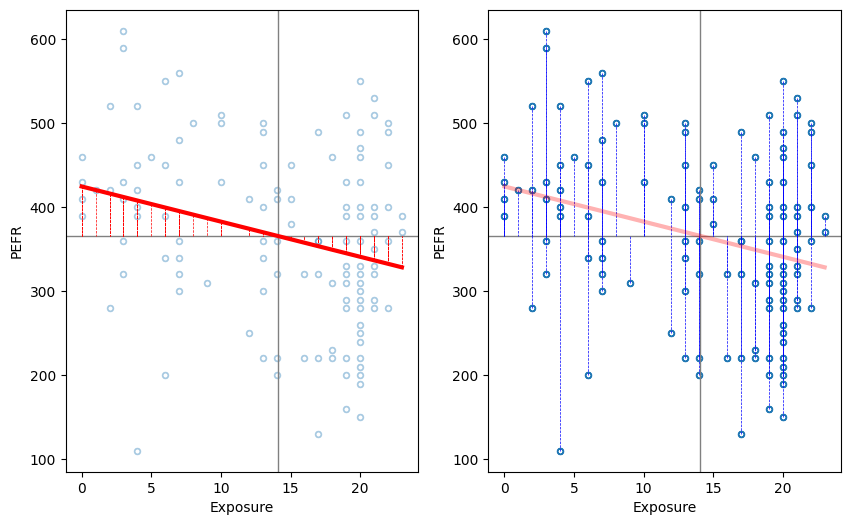

In [32]:
x = np.linspace(0,23,50)
y = model(x,fit.x[0],fit.x[1])

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.axhline(lunge["PEFR"].mean(), color="grey", lw=1)
ax1.axvline(lunge["Exposure"].mean(), color="grey", lw=1)
ax1.vlines(lunge["Exposure"],predict(lunge["Exposure"]),predict(lunge["Exposure"]).mean(),linestyles="dashed",lw=0.5,color="red")
lunge.plot.scatter(x = "Exposspiratory Flow Rate): ure", y = "PEFR", ax = ax1, marker="$\u25EF$",alpha = 0.3)
ax1.set_xlabel("Exposure")
ax1.set_ylabel("PEFR")
ax1.plot(x,y,color="red",lw=3)

ax2 = fig.add_subplot(1,2,2)
ax2.axhline(lunge["PEFR"].mean(), color="grey", lw=1)
ax2.axvline(lunge["Exposure"].mean(), color="grey", lw=1)
ax2.vlines(lunge["Exposure"],lunge["PEFR"],lunge["PEFR"].mean(),linestyles="dashed",lw=0.5,color="blue")
lunge.plot.scatter(x = "Exposure", y = "PEFR", ax = ax2, marker="$\u25EF$")
ax2.set_xlabel("Exposure")
ax2.set_ylabel("PEFR")
ax2.plot(x,y,color="red",lw=3,alpha = 0.3)
plt.show()

### <span style="color:rgb(160,0,86)">Aufgabe 1</span>

- Machen Sie einen **Hypothesentest** für den Prädiktor ***Exposure**.

- Berechnen Sie ein **Konfidenzintervall** für das Gewicht vom Prädiktor ***Exposure**.

- Berechnen Sie ein **Vorhersageintervall** für die Zielgrösse ***PEFR*** für Arbeiter mit einem Wert ***Expsoure***$\pmb{ \;= 10.7}$. 

Hypothese: Die Exposure hat keine Einfluss auf die PEFR
Beobachteter Koeffizient: -4.1846
Resampling-basierter p-Wert: 0.0
Gegenhypothese tritt in kraft: Die Exposure hat einen Einfluss auf die PEFR


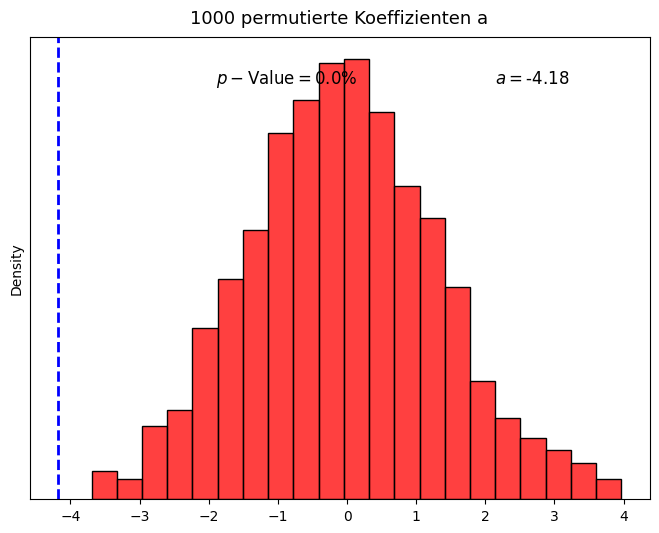

In [9]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import seaborn as sns
import matplotlib.pyplot as plt

print("Hypothese: Die Exposure hat keine Einfluss auf die PEFR")

lunge = pd.read_csv("Daten/LungDisease.csv")

def model(x,a,b):
    return a*x + b

def RSS(coeffs):
    residuen = lunge["PEFR"].to_numpy() - model(lunge["Exposure"].to_numpy(),coeffs[0],coeffs[1])
    return (residuen**2).sum()

fit = minimize(RSS, x0=np.zeros(2))


n_permutations = 1000
coefs = []

for _ in range(n_permutations):
    B_permuted = np.random.permutation(lunge["PEFR"].to_numpy())
    def RSS(coeffs):
        residuen = B_permuted - model(lunge["Exposure"],coeffs[0],coeffs[1])
        return (residuen**2).sum()
    fit_permuted = minimize(RSS, x0=np.zeros(2))
    coefs.append(fit_permuted.x[0])

# p-Wert berechnen (zweiseitig)
coefs = np.array(coefs)
p_value = 100 * np.mean(np.abs(coefs) >= np.abs(fit.x[0]))

print(f"Beobachteter Koeffizient: {fit.x[0]:.4f}")
print(f"Resampling-basierter p-Wert: {p_value:}")
print("Gegenhypothese tritt in kraft: Die Exposure hat einen Einfluss auf die PEFR")

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax = sns.histplot(coefs,stat="density",color="red")
ax = plt.axvline(fit.x[0],color="blue",lw=2,linestyle="dashed")
ax = plt.text(0.75,0.9,r"$a=$"+"{m:1.2f}".format(m=fit.x[0]),
                   fontsize=12,transform=plt.gca().transAxes)
ax = plt.text(0.3,0.9,r"$p-$"+"Value"+r"$ = $"+"{p:1.1f}%".format(p=p_value),
                   fontsize=12,transform=plt.gca().transAxes)
ax = plt.title("1000 permutierte Koeffizienten a",
                    fontsize=13,pad=10)
ax = plt.xlabel("")
ax = plt.yticks([])

In [10]:
n_bootstrap = 1000
coef_samples = []
n = lunge.shape[0]

A = lunge["Exposure"].to_numpy()
B = lunge["PEFR"].to_numpy()

for _ in range(n_bootstrap):
    indices = np.random.choice(n, n, replace=True)
    A_sample = A[indices]
    B_sample = B[indices]
    def RSS(coeffs):
        residuen = B_sample - model(A_sample,coeffs[0],coeffs[1])
        return (residuen**2).sum()
    fit_permuted = minimize(RSS, x0=np.zeros(2))
    coef_samples.append(fit_permuted.x[0])

# Konfidenzintervall berechnen (z. B. 95%)
lower = np.percentile(coef_samples, 2.5)
upper = np.percentile(coef_samples, 97.5)

print(f"Beobachteter Koeffizient: {fit.x[0]:.4f}")
print(f"95%-Konfidenzintervall (Bootstrap): [{lower:.4f}, {upper:.4f}]")

Beobachteter Koeffizient: -4.1846
95%-Konfidenzintervall (Bootstrap): [-6.6577, -1.7293]


In [12]:
def predict(x):
    return model(x,fit.x[0],fit.x[1])

exposure = 10.7
pefr = predict(exposure)
print("Für Exposure =",exposure,"finden wir die Vorhersage PEFR =",pefr)

n_bootstrap = 1000
predictions = []

A = lunge["Exposure"].to_numpy()
B = lunge["PEFR"].to_numpy()

for _ in range(n_bootstrap):
    indices = np.random.choice(n, n, replace=True)
    A_sample = A[indices]
    B_sample = B[indices]
    def RSS(coeffs):
        residuen = B_sample - model(A_sample,coeffs[0],coeffs[1])
        return (residuen**2).sum()
    fit_permuted = minimize(RSS, x0=np.zeros(2))
    
    # Vorhersage inkl. zufälligem Fehler (residuenbasiert)
    def predict(x):
        return model(x,fit_permuted.x[0],fit_permuted.x[1])
    
    b_pred = predict(exposure)
    # Schätzfehler aus Residuen
    residuals = B_sample - predict(A_sample)
    error = np.random.choice(residuals) # Zufälliges wählen eines Fehlers
    b_pred_with_noise = b_pred + error

    predictions.append(b_pred_with_noise)

# 95%-Vorhersageintervall
lower = np.percentile(predictions, 2.5)
upper = np.percentile(predictions, 97.5)

print(f"95%-Vorhersageintervall bei exposure={exposure}: [{lower:.4f}, {upper:.4f}]")

Für Exposure = 10.7 finden wir die Vorhersage PEFR = 379.8078529885396
95%-Vorhersageintervall bei exposure=10.7: [178.3930, 560.6467]


### <span style="color:rgb(160,0,86)">Aufgabe 2</span>

- Machen Sie eine **lineare Regressionsanalyse** für den Zusammenhang zwischen der ***Zeitspanne*** und der ***Eruptionsdauer*** des **Geysirs Old Faithful** im Yellowstone National Park mit dem Datensatz *geysir.dat*. Aus dem Prädiktor ***Zeitspanne*** soll die  ***Erupionsdauer*** geschätzt werden.

- Berechnen Sie auch ein **Vorhersageintervall** für die ***Eruptionsdauer***, wenn die ***Zeitspanne*** 75 Minuten beträgt.

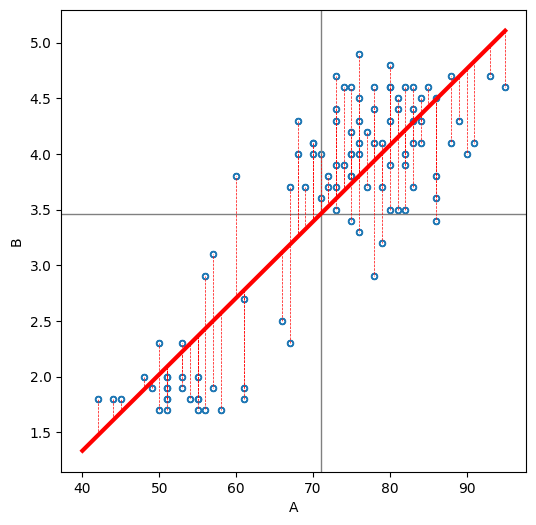

In [13]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import seaborn as sns
import matplotlib.pyplot as plt

def model(x,a,b):
    return a*x + b

df = pd.read_csv("Daten/geysir.dat", delimiter=" ")

time_period = df["Zeitspanne"].to_numpy()
eruption_period = df["Eruptionsdauer"].to_numpy()

def RSS(coeffs):
        residuen = eruption_period - model(time_period,coeffs[0],coeffs[1])
        return (residuen**2).sum()

fit = minimize(RSS, x0=np.zeros(2))

def predict(x):
    return model(x,fit.x[0],fit.x[1])

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.axhline(eruption_period.mean(), color="grey", lw=1)
ax1.axvline(time_period.mean(), color="grey", lw=1)
ax1.vlines(time_period,predict(time_period),eruption_period,linestyles="dashed",lw=0.5,color="red")
df.plot.scatter(x = "Zeitspanne", y = "Eruptionsdauer", ax = ax1, marker="$\u25EF$")
ax1.set_xlabel("A")
ax1.set_ylabel("B")

x = np.linspace(40,95,50)
y = model(x,fit.x[0],fit.x[1])
ax1.plot(x,y,color="red",lw=3)
plt.show()



In [15]:
def predict(x):
    return model(x,fit.x[0],fit.x[1])

time_period_new = 75
eruption_period_new = predict(time_period_new)
print("Für Zeitspanne =",time_period_new,"finden wir die Vorhersage Eruptionsdauer =",eruption_period_new)

n_bootstrap = 1000
predictions = []
n = df.shape[0]

for _ in range(n_bootstrap):
    indices = np.random.choice(n, n, replace=True)
    A_sample = time_period[indices]
    B_sample = eruption_period[indices]
    def RSS(coeffs):
        residuen = B_sample - model(A_sample,coeffs[0],coeffs[1])
        return (residuen**2).sum()
    fit_permuted = minimize(RSS, x0=np.zeros(2))
    
    # Vorhersage inkl. zufälligem Fehler (residuenbasiert)
    def predict(x):
        return model(x,fit_permuted.x[0],fit_permuted.x[1])
    
    b_pred = predict(time_period_new)
    # Schätzfehler aus Residuen
    residuals = B_sample - predict(A_sample)
    error = np.random.choice(residuals) # Zufälliges wählen eines Fehlers
    b_pred_with_noise = b_pred + error

    predictions.append(b_pred_with_noise)

# 95%-Vorhersageintervall
lower = np.percentile(predictions, 2.5)
upper = np.percentile(predictions, 97.5)

print(f"95%-Vorhersageintervall bei exposure={time_period_new}: [{lower:.4f}, {upper:.4f}]")

Für Zeitspanne = 75 finden wir die Vorhersage Eruptionsdauer = 3.7351719190133696
95%-Vorhersageintervall bei exposure=75: [2.7493, 4.7986]


### <span style="color:rgb(160,0,86)">Aufgabe 3</span>

- Machen Sie eine **lineare Regressionsanalyse** für den Zusammenhang zwischen den Tagesrenditen der Indexfonds ***QQQ*** und der ***SPY*** im Datensatz *sp500_data.csv*. Aus dem Prädiktor ***SPY*** soll die Tagesrendite von ***QQQ*** geschätzt werden.

- Berechnen Sie auch ein **Vorhersageintervall** für ***QQQ***, wenn ***SPY*** bei seinem Median liegt.

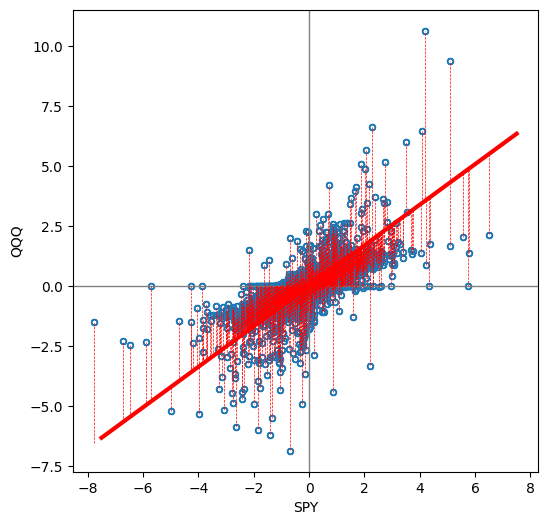

In [16]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import seaborn as sns
import matplotlib.pyplot as plt

def model(x,a,b):
    return x*a + b
df = pd.read_csv("Daten/sp500_data.csv.gz")


spys = df["SPY"].to_numpy()
qqqs = df["QQQ"].to_numpy()

def RSS(coeffs):
    residuen = spys - model(qqqs,coeffs[0],coeffs[1])
    return (residuen**2).sum()

fit = minimize(RSS, x0=np.zeros(2))

def predict(x):
    return model(x,fit.x[0],fit.x[1])

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.axhline(qqqs.mean(), color="grey", lw=1)
ax1.axvline(spys.mean(), color="grey", lw=1)
ax1.vlines(spys,predict(spys),qqqs,linestyles="dashed",lw=0.5,color="red")
df.plot.scatter(x = "SPY", y = "QQQ", ax = ax1, marker="$\u25EF$")
ax1.set_xlabel("SPY")
ax1.set_ylabel("QQQ")

x = np.linspace(-7.5,7.5,50)
y = model(x,fit.x[0],fit.x[1])
ax1.plot(x,y,color="red",lw=3)
plt.show()

In [17]:
def predict(x):
    return model(x,fit.x[0],fit.x[1])

spy = spys.mean()
qqq = predict(spy)
print("Für SPY =",spy,"finden wir die Vorhersage QQQ =",qqq)

n_bootstrap = 1000
predictions = []
n = df.shape[0]

for _ in range(n_bootstrap):
    indices = np.random.choice(n, n, replace=True)
    A_sample = spys[indices]
    B_sample = qqqs[indices]
    def RSS(coeffs):
        residuen = B_sample - model(A_sample,coeffs[0],coeffs[1])
        return (residuen**2).sum()
    fit_permuted = minimize(RSS, x0=np.zeros(2))
    
    # Vorhersage inkl. zufälligem Fehler (residuenbasiert)
    def predict(x):
        return model(x,fit_permuted.x[0],fit_permuted.x[1])
    
    b_pred = predict(spy)
    # Schätzfehler aus Residuen
    residuals = B_sample - predict(A_sample)
    error = np.random.choice(residuals) # Zufälliges wählen eines Fehlers
    b_pred_with_noise = b_pred + error

    predictions.append(b_pred_with_noise)

# 95%-Vorhersageintervall
lower = np.percentile(predictions, 2.5)
upper = np.percentile(predictions, 97.5)

print(f"95%-Vorhersageintervall bei exposure={spy}: [{lower:.4f}, {upper:.4f}]")

Für SPY = -0.006539974025460647 finden wir die Vorhersage QQQ = 0.0003163039881937035
95%-Vorhersageintervall bei exposure=-0.006539974025460647: [-1.2267, 0.9975]


![HSLU](Bilder/LogoHSLU.png)